In [6]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
from IPython.display import HTML

import scvelo as scv
import scanpy as sc
import anndata as an
import scvi
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!ls -al /nfs/turbo/umms-indikar/shared/projects/HSC/pipeline_outputs/integrated_anndata/cell_cycle/TrajectoryNet/

total 4584
drwxrws---+ 5 cstansbu umms-indikar-turbo     572 Aug 29 13:38 .
drwxrws---+ 3 cstansbu umms-indikar-turbo     136 Aug 29 08:43 ..
-rwxrwx---  1 cstansbu umms-indikar-turbo 1698528 Aug 29 13:38 backward_trajectories.npy
-rwxrwx---  1 cstansbu umms-indikar-turbo   46729 Aug 29 13:36 checkpt-10000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 09:00 checkpt-1000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 09:21 checkpt-2000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 09:44 checkpt-3000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 10:08 checkpt-4000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 10:37 checkpt-5000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 11:09 checkpt-6000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 11:43 checkpt-7000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   46701 Aug 29 12:19 checkpt-8000.pth
-rwxrwx---  1 cstansbu umms-indikar-turbo   4670

# Load data

In [2]:
%%time
fpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/pipeline_outputs/integrated_anndata/cell_cycle/pseudotime.h5ad"
adata = sc.read_h5ad(fpath)
adata

CPU times: user 263 ms, sys: 3.69 s, total: 3.95 s
Wall time: 6.97 s


AnnData object with n_obs × n_vars = 6895 × 15906
    obs: 'batch', 'phase', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'n_reads', 'raw_clusters', 'bbknn_clusters', 'harmony_clusters', 'cluster_str', 'barcoded_phase', 'S_score', 'G2M_score', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices', 'G1_pseudotime', 'G1_order', 'G2M_pseudotime', 'G2M_order', 'mean_pseudotime', 'mean_order', 'nnz', 'velocyto_cell_id', 'cell_id', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'leiden', 'cluster_phase', 'early_g1_score', 'G1_stage', 'global_ordering', 'global_ordering_bin', 'velocity_self_tra

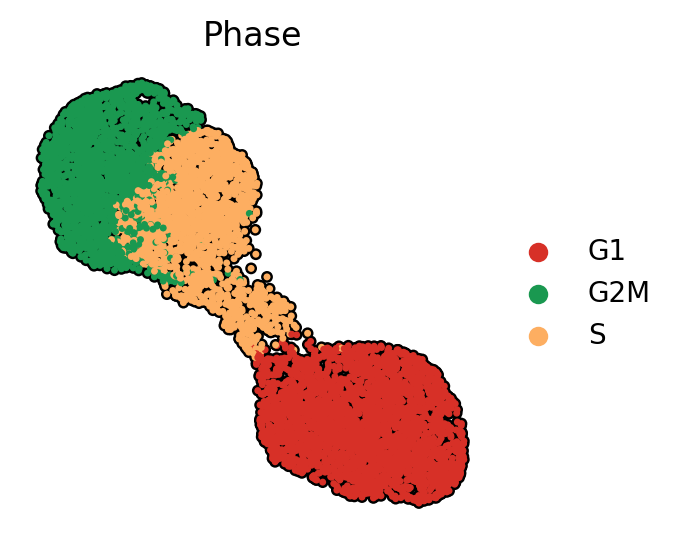

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

# --- Static background ---
palette = {
    "G1": "#D73027",        
    "S": "#FDAE61",       
    "G2M": "#1A9850",    
    "unknown": "#B0B0B0", 
}
    
sc.pl.umap(
    adata,
    color='cluster_phase',
    size=25,
    ncols=3,
    alpha=1,
    use_raw=False,
    add_outline=True,
    outline_color=('k', 'k'),
    palette=palette,
    title='Phase',
    frameon=False,
    wspace=0.25,
)

# Load inferred Trajectories

In [4]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/pipeline_outputs/integrated_anndata/cell_cycle/TrajectoryNet/backward_trajectories.npy"

data = np.load(fpath)
# shape is [timepoints, cells, components]
print(f"{data.shape=}")

data.shape=(100, 2123, 2)


NameError: name 'FuncAnimation' is not defined

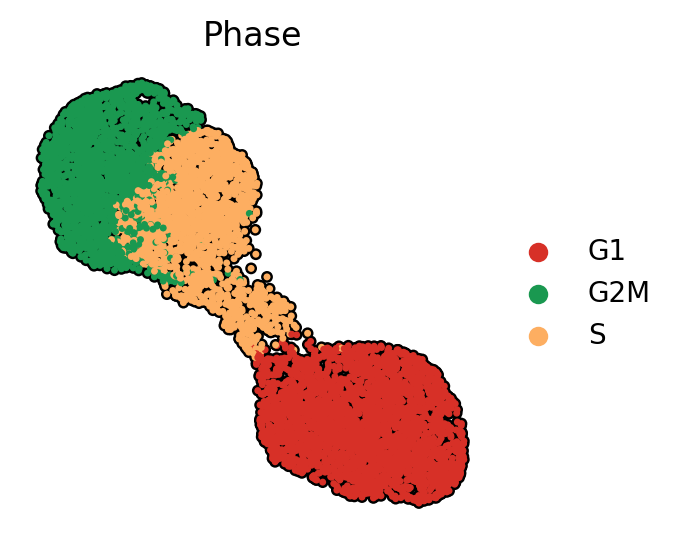

In [5]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 3

# --- Static background ---
palette = {
    "G1": "#D73027",        
    "S": "#FDAE61",       
    "G2M": "#1A9850",    
    "unknown": "#B0B0B0", 
}
    
sc.pl.umap(
    adata,
    color='cluster_phase',
    size=25,
    ncols=3,
    alpha=1,
    use_raw=False,
    add_outline=True,
    outline_color=('k', 'k'),
    palette=palette,
    title='Phase',
    frameon=False,
    wspace=0.25,
    show=False,
)

fig = plt.gcf()
ax = plt.gca()

# --- Overlay for animation ---
timepoints, cells, _ = data.shape
scat = ax.scatter([], [], s=8, c="black", alpha=0.8)

def update(frame):
    xy = data[frame]      # shape (cells, 2)
    scat.set_offsets(xy)
    ax.set_title(f"UMAP overlay, time={frame}")
    return scat,

ani = FuncAnimation(fig, update, frames=timepoints, interval=100, blit=True)

# --- Show inline in Jupyter ---
HTML(ani.to_jshtml())